In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![](pic3.png)

$y = y_{1}, \quad y' = y_{2}$

$$
y_{1}' = y_{2}, \quad y_{2}' = x \sqrt{y_{1}}, \\
y_{1}(0) = 0, \quad y_{2}(0) = \alpha
$$

In [2]:
def f(t, y: list):
    y1, y2 = y
    
    f1 = y2
    f2 = t * np.sqrt(y1)
    f = np.array([f1, f2])
    return f

In [3]:
def rk(alpha):
    """
    возвращет сетку и значения функции на ней при заданном альфа
    """
    t_n = 1
    h = 0.005 
    N = int(t_n / h) + 2

    t = np.linspace(0, t_n, N+1)
    y = np.zeros((N+1, 2))

    # начальные условия
    y[0][0] = 0
    y[0][1] = alpha

    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i]+h/2, y[i]+(h/2)*k1)
        k3 = f(t[i]+h/2, y[i]+(h/2)*k2)
        k4 = f(t[i]+h, y[i]+h*k3)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return [t, y[:, 0]]

Подберем отрезок [L, R] в котором будет лежать значение $\alpha^{*}$ такое, что правое граничное условие выполнено с некоторой точностью $\varepsilon$

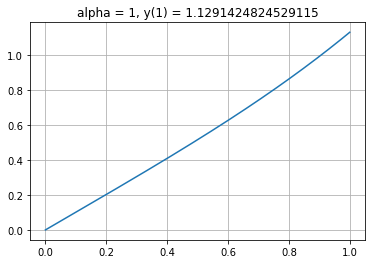

In [4]:
# левая границца
alpha = 1
t, y = rk(alpha)
plt.plot(t, y)
plt.title(f'alpha = {alpha}, y(1) = {y[-1]}')
plt.grid()

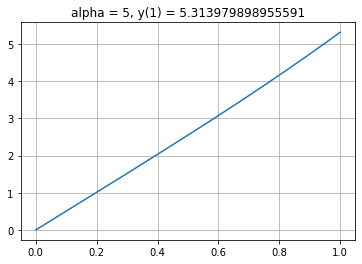

In [5]:
# правая границца
alpha = 5
t, y = rk(alpha)
plt.plot(t, y)
plt.title(f'alpha = {alpha}, y(1) = {y[-1]}')
plt.grid()

In [6]:
L = 1
R = 5
eps = 1e-4
yn = 2  # точное значение на границе

def func(alpha):
    return rk(alpha)[1][-1]  # значение на правой границе при заданном альфа

# решаем уравнение "func(a) = yn" с помощью бинпоиска 
mid = L
while abs(func(mid) - yn) > eps:
    mid = (R + L) / 2
    if func(mid) < yn:
        L = mid
    else:
        R = mid

ans = mid   

In [7]:
ans

1.8216552734375

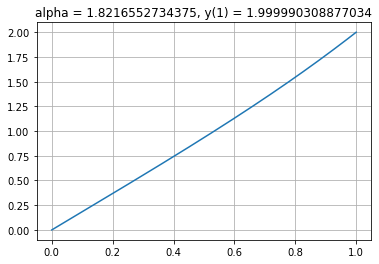

In [8]:
t, y = rk(ans)
plt.plot(t, y)
plt.title(f'alpha = {ans}, y(1) = {y[-1]}')
plt.grid()